---
## **Loan Status Prediction using Support Vector Machine**
## **by: Harrish Ragavendar S**
---

### **Importing the Libraries**

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### **Reading the Dataset**

In [104]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
df.shape

(614, 13)

### **Dropping the Missing Values**

In [106]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
df = df.dropna()

In [108]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
df.shape

(480, 13)

### **Label Encoding**

In [110]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [111]:
df.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
df.replace({"Married":{'No':0,'Yes':1}},inplace=True)
df.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
df.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
df.replace({"Property_Area":{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [112]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,LP001024,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


### **Data Cleaning**

In [113]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [114]:
df = df.replace(to_replace='3+',value=4)

In [115]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### **Data Visualization**

<AxesSubplot:xlabel='Education', ylabel='count'>

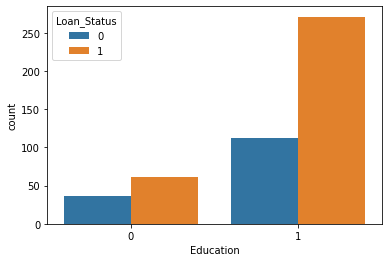

In [116]:
sns.countplot(x="Education",hue="Loan_Status",data=df)

### **Splitting the Dataset as training and testing sets**

In [117]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [119]:
print(X_train.shape,X_test.shape)

(384, 11) (96, 11)


### **Training the Support Vector Machine Model**

In [120]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

### **Model Evaluation**

### *1.Accuracy on Training Dataset*

In [121]:
predicted_train = classifier.predict(X_train)
accuracy_score(predicted_train,y_train)

0.8046875

### *2.Accuracy on Testing Dataset*

In [122]:
predicted_test = classifier.predict(X_test)
accuracy_score(predicted_test,y_test)

0.7291666666666666

### **Conclusion**

### *Hence our Support Vector Machine Model for Loan Status Prediction has a good accuracy of around 80%.*
---